<a href="https://colab.research.google.com/github/YASHGARG7004/Ml-project/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,9926
1.0,38


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

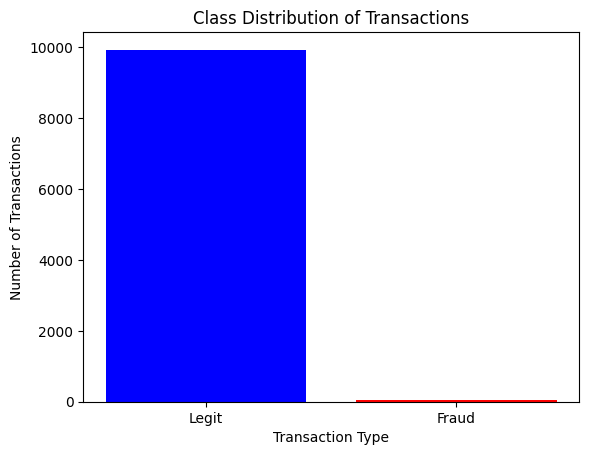

In [17]:

# Replace these with the actual counts from your dataset
legit_count = len(legit)  # Count of non-fraudulent transactions
fraud_count = len(fraud)  # Count of fraudulent transactions

# Creating the bar graph
categories = ['Legit', 'Fraud']
counts = [legit_count, fraud_count]

plt.bar(categories, counts, color=['blue', 'red'])
plt.title('Class Distribution of Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()


In [10]:
print(legit.shape)
print(fraud.shape)

(9926, 31)
(38, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,9926.000000
mean,62.919501
std,184.041297
min,0.000000
25%,5.172500
50%,15.950000
75%,51.067500
max,7712.430000


In [18]:
fraud.Amount.describe()

,Amount
count,38.000000
mean,75.730526
std,304.521215
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [19]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5921.607697,-0.235577,0.266833,0.934388,0.239735,-0.041743,0.140925,-0.057661,-0.069971,0.813003,...,0.026103,-0.055139,-0.152043,-0.033460,0.023142,0.087567,0.107554,0.003624,0.001701,62.919501
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [20]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [21]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6292,7429,-0.894899,1.508902,0.576864,1.765774,-0.419279,-0.250946,-0.341049,0.740763,0.353782,...,0.102428,0.328716,0.007327,0.028704,-0.197072,-0.161696,-0.265327,-0.107466,6.50,0.0
1127,874,-0.445099,0.754145,1.361999,-1.184238,-0.036773,-0.941421,0.698625,-0.026480,-0.134956,...,-0.015807,0.056658,0.008857,0.450117,-0.311580,0.774707,0.203999,0.088460,7.69,0.0
9333,13530,1.040073,0.077555,1.578139,2.972188,-0.953655,0.160322,-0.728837,0.188170,1.702281,...,-0.233389,-0.472880,0.041259,0.253734,0.188612,-0.079262,-0.005749,0.032646,45.46,0.0
6626,8134,-0.714753,0.900429,1.784709,-1.075655,-0.245696,-1.045768,0.446151,-0.099374,1.515596,...,-0.230301,-0.470372,-0.038075,0.319398,-0.416626,0.672050,0.088211,0.162497,1.46,0.0
1697,1313,-1.360262,1.542735,1.656781,0.966889,-0.512783,-0.321964,0.174818,0.401854,-0.137097,...,-0.172939,-0.512888,-0.138364,0.362893,0.372739,-0.428265,-0.195059,0.080167,0.99,0.0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.0,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.0,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.0,1.0
9509,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.0,1.0


In [24]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,38


In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,6014.376016,-0.186870,0.260797,0.891947,0.204263,-0.107716,0.202954,-0.007424,-0.001591,0.832824,...,-0.002655,-0.074622,-0.159527,-0.047121,0.051397,0.068698,0.147073,0.015938,0.006911,72.930386
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


Splitting the data into Features & Targets

In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

       Time        V1        V2         V3         V4        V5        V6  \
6292   7429 -0.894899  1.508902   0.576864   1.765774 -0.419279 -0.250946   
1127    874 -0.445099  0.754145   1.361999  -1.184238 -0.036773 -0.941421   
9333  13530  1.040073  0.077555   1.578139   2.972188 -0.953655  0.160322   
6626   8134 -0.714753  0.900429   1.784709  -1.075655 -0.245696 -1.045768   
1697   1313 -1.360262  1.542735   1.656781   0.966889 -0.512783 -0.321964   
...     ...       ...       ...        ...        ...       ...       ...   
9035  12597 -2.589617  7.016714 -13.705407  10.343228 -2.954461 -3.055116   
9179  13126 -2.880042  5.225442 -11.063330   6.689951 -5.759924 -2.244031   
9252  13323 -5.454362  8.287421 -12.752811   8.594342 -3.106002 -3.179949   
9487  14073 -4.153014  8.204797 -15.031714  10.330100 -3.994426 -3.250013   
9509  14152 -4.710529  8.636214 -15.496222  10.313349 -4.351341 -3.322689   

             V7        V8        V9  ...       V20       V21       V22  \
6

In [29]:
print(Y)

6292    0.0
1127    0.0
9333    0.0
6626    0.0
1697    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 530, dtype: float64


Split the data into Training data & Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(530, 30) (424, 30) (106, 30)


Model Training

Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437
